Зфдание 1. Используйте набор данных с изображениями рукописных цифр (например, MNIST) и обучите модель классификации (например, метод опорных векторов) для распознавания цифр.

In [2]:
!pip install kagglehub
!pip install numpy

# Загружаю  датасет

In [ ]:
import kagglehub
import os
import struct 
import numpy as np

from array import array

path = kagglehub.dataset_download("hojjatk/mnist-dataset")

train_image_path = os.path.join(path, 'train-images.idx3-ubyte')  
train_label_path = os.path.join(path, 'train-labels.idx1-ubyte')  

test_image_path = os.path.join(path, 't10k-images.idx3-ubyte') 
test_label_path = os.path.join(path, 't10k-labels.idx1-ubyte')  



train_image = []
train_label = []
test_image = []
test_label = []

def get_images_set(path:str)->array:   
    with open(path, 'rb') as fn:
        head = struct.unpack(">IIII", fn.read(16))
        images = np.array(array("B", fn.read())).reshape(head[1], head[2], head[3])
        return images
    
def get_labels_set(path:str)->array:
    with open(path, 'rb') as fn:
        fn.read(8)
        labels = np.array(array("B", fn.read()))
        return labels 

train_image = get_images_set(train_image_path)
test_image = get_images_set(test_image_path)
train_label = get_labels_set(train_label_path)
test_label = get_labels_set(test_label_path)

c:\Users\Alwx\Desktop\PythonProjects\Homework_2_1\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
!pip install matplotlib

## Отображение чисел из датасета 

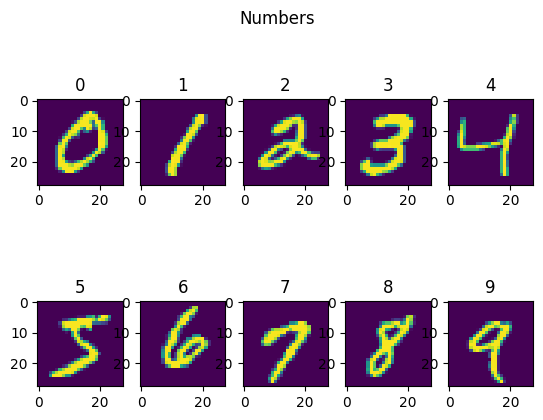

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,5)
fig.suptitle('Numbers')


def show_image(index:int, col:int, row:int):    
    axs[col,row].set_title(train_label[index])
    axs[col,row].imshow(train_image[index])
    

def show_image_of_digit(digit:int, col:int, row:int):
    first_ind = np.where(train_label==digit)[0][0]
    show_image(first_ind, col, row)

show_image_of_digit(0,0,0)
show_image_of_digit(1,0,1)
show_image_of_digit(2,0,2)
show_image_of_digit(3,0,3)
show_image_of_digit(4,0,4)
show_image_of_digit(5,1,0)
show_image_of_digit(6,1,1)
show_image_of_digit(7,1,2)
show_image_of_digit(8,1,3)
show_image_of_digit(9,1,4)



In [6]:
train_image_flatten = [item.flatten() for item in train_image]
test_image_flatten = [item.flatten() for item in test_image]

X_train , Y_train = train_image_flatten, train_label
x_test, y_test = test_image_flatten, test_label 

## Распределение записей по классам (цифрам)

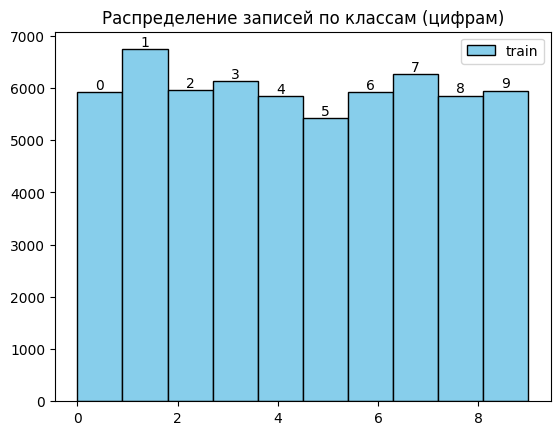

In [7]:

def SamplesAmount(Y_train):
    plt.title("Распределение записей по классам (цифрам)")
    counts, bins, patches = plt.hist([Y_train],label=['train'], color='skyblue', edgecolor='black')
    plt.bar_label(patches, (0,1,2,3,4,5,6,7,8,9))
    plt.legend()
    plt.show()

SamplesAmount(Y_train)

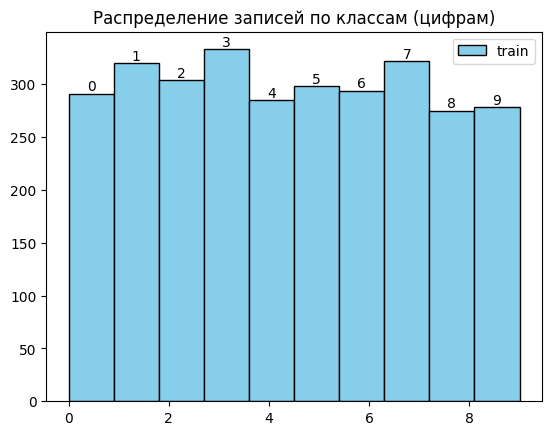

In [8]:
X_train_origin = X_train.copy()
Y_train_origin = Y_train.copy()

X_train = X_train[::20] #Беру только каждое 20 число 
Y_train = Y_train[::20]

#Смотрю количество записей каждого класса
SamplesAmount(Y_train)

## Метод К-ближайших соседей

In [9]:
!pip install scikit-learn

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

def KNeib(X_tr,Y_tr,X_ts, Y_ts, n_neib=3, show_output=True):
    
    clsf = KNeighborsClassifier(n_neib)
    clsf.fit(X_tr, Y_tr)
    y_pred = clsf.predict(X_ts)

    conf_matrix = confusion_matrix(Y_ts, y_pred)

    accuracy = accuracy_score(Y_ts, y_pred)

    if show_output:
        print("Метрики качества:")
        print(classification_report(Y_ts, y_pred))

        print("Матрица ошибок:")
        print(conf_matrix)
        
        print(f"Точность модели: {accuracy}")
    return accuracy


kNeib_result = KNeib(X_train, Y_train, x_test, y_test)


Метрики качества:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.89      1.00      0.94      1135
           2       0.95      0.89      0.92      1032
           3       0.92      0.93      0.92      1010
           4       0.88      0.92      0.90       982
           5       0.90      0.89      0.89       892
           6       0.94      0.96      0.95       958
           7       0.90      0.91      0.91      1028
           8       0.97      0.82      0.89       974
           9       0.90      0.84      0.87      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.91     10000

Матрица ошибок:
[[ 960    2    3    0    1    4    8    2    0    0]
 [   0 1130    4    1    0    0    0    0    0    0]
 [  28   24  923    9    8    1    1   27    7    4]
 [   1    7   15  938    1   23    0    6   14  

## Ищу лучшее n

In [11]:

neibs_amount = (1,2,3,5,7,10,20, 40, 50, 100)
accur = []

for i in neibs_amount:
    accur.append(KNeib(X_train, Y_train, x_test, y_test, i, False))



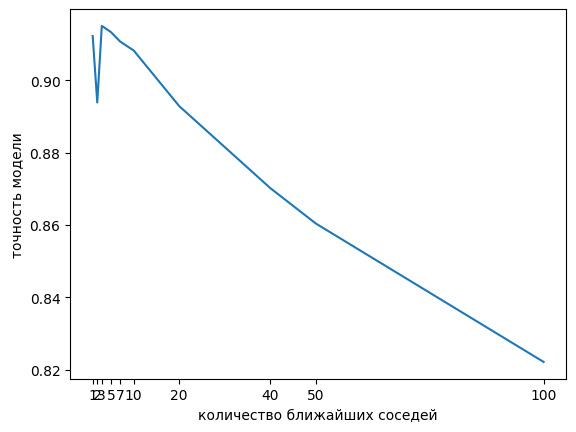

In [12]:
plt.plot(neibs_amount,accur)
plt.ylabel("точность модели")
plt.xlabel("количество ближайших соседей")
plt.xticks(neibs_amount)
plt.show()

## L1-регуляризация + K-ближайших соседей

In [13]:
X_train_regul = normalize(X_train, norm='l1')
X_test_regul = normalize(x_test, norm='l1')

l1_result = KNeib(X_train_regul, Y_train, X_test_regul, y_test)

Метрики качества:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.91      0.93      1032
           3       0.92      0.90      0.91      1010
           4       0.91      0.89      0.90       982
           5       0.96      0.83      0.89       892
           6       0.93      0.96      0.95       958
           7       0.94      0.89      0.92      1028
           8       0.87      0.93      0.90       974
           9       0.87      0.85      0.86      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

Матрица ошибок:
[[ 971    0    2    0    0    0    4    0    2    1]
 [   0 1111    9    1    0    0    6    0    8    0]
 [  26    0  940    8   10    0    4   16   25    3]
 [  13    2   14  909    1   15    1    7   42  

## L2-регуляризация + K-ближайших соседей

In [14]:
X_train_regul = normalize(X_train, norm='l2')
X_test_regul = normalize(x_test, norm='l2')

l2_result = KNeib(X_train_regul, Y_train, X_test_regul, y_test)

Метрики качества:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       980
           1       0.94      0.99      0.96      1135
           2       0.95      0.93      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.92      0.92      0.92       982
           5       0.95      0.88      0.92       892
           6       0.94      0.97      0.96       958
           7       0.93      0.92      0.92      1028
           8       0.94      0.90      0.92       974
           9       0.90      0.87      0.88      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

Матрица ошибок:
[[ 968    2    3    0    0    0    6    1    0    0]
 [   0 1122    8    1    0    0    2    0    2    0]
 [  22    4  955    7    8    0    2   20   13    1]
 [   5    1   10  937    0   15    1    7   28  

## Избавляюсь от дизбаланса классов. Удаляю данные из оверсемплированых данных 

In [15]:
!pip install imblearn

In [16]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

X_over, y_over = undersample.fit_resample(X_train_regul, Y_train)

undersample_l2_result = KNeib(X_over, y_over, X_test_regul, y_test)

Метрики качества:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       980
           1       0.94      0.99      0.96      1135
           2       0.95      0.93      0.94      1032
           3       0.94      0.91      0.93      1010
           4       0.92      0.92      0.92       982
           5       0.95      0.89      0.92       892
           6       0.94      0.97      0.96       958
           7       0.93      0.92      0.92      1028
           8       0.93      0.90      0.92       974
           9       0.90      0.87      0.88      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

Матрица ошибок:
[[ 968    2    3    0    0    0    6    1    0    0]
 [   0 1122    8    1    0    0    2    0    2    0]
 [  21    4  956    7    8    0    2   20   13    1]
 [   9    1   11  922    0   19    1    7   34  

## Метод понижения размерности  -- РСА

In [17]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.fit_transform(x_test)

pca_result = KNeib(X_train_pca, Y_train, x_test_pca, y_test)

Метрики качества:
              precision    recall  f1-score   support

           0       0.48      0.74      0.58       980
           1       0.81      0.94      0.87      1135
           2       0.21      0.31      0.25      1032
           3       0.36      0.45      0.40      1010
           4       0.35      0.44      0.39       982
           5       0.18      0.14      0.16       892
           6       0.31      0.18      0.23       958
           7       0.44      0.44      0.44      1028
           8       0.25      0.10      0.14       974
           9       0.33      0.17      0.23      1009

    accuracy                           0.40     10000
   macro avg       0.37      0.39      0.37     10000
weighted avg       0.38      0.40      0.38     10000

Матрица ошибок:
[[ 721    1   62   10    5   99   54    0   25    3]
 [   0 1062   21   21    5   10    4    4    4    4]
 [ 176   53  320  243   17   89   62    6   60    6]
 [  54   35  274  452   13   73   27   11   66  

## Метод понижения размерности  -- TSNE

In [25]:
from sklearn.manifold import TSNE
import numpy as np


tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_train_tsne = tsne.fit_transform(np.array(X_train))
X_test_tsne = tsne.fit_transform(np.array(x_test))

tsne_result = KNeib(X_train_tsne, Y_train, X_test_tsne, y_test)

Метрики качества:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       980
           1       0.77      0.70      0.73      1135
           2       0.55      0.85      0.67      1032
           3       0.73      0.82      0.77      1010
           4       0.62      0.55      0.58       982
           5       0.69      0.59      0.64       892
           6       0.77      0.81      0.79       958
           7       0.55      0.65      0.59      1028
           8       0.80      0.58      0.67       974
           9       0.37      0.27      0.31      1009

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

Матрица ошибок:
[[760   1 189   0   1   3   5   0  14   7]
 [  0 799 249   2   0   0   1  71  13   0]
 [  9  76 882   7   7   4   2  15  29   1]
 [  1   4  71 829   1  78   2  12   6   6]
 [  0   6  27   9 544   5  13  52  

## Random forest classifier + L2 regularization + under sampling

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

clsf =  RandomForestClassifier(
        max_depth=50, n_estimators=400, max_features=10, random_state=42)

clsf.fit(X_over, y_over)

y_pred = clsf.predict(X_test_regul)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)

rfc_result = accuracy

print(f"Точность модели: {accuracy}")

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.95      0.96      1135
           2       0.89      0.92      0.90      1032
           3       0.97      0.88      0.92      1010
           4       0.90      0.94      0.92       982
           5       0.92      0.91      0.92       892
           6       0.93      0.97      0.95       958
           7       0.94      0.91      0.92      1028
           8       0.87      0.92      0.90       974
           9       0.91      0.87      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[ 957    0    4    0    1    3    8    1    5    1]
 [   0 1073   33    2    1    1    6    0   18    1]
 [  17    1  948    5   19    1    6   17   15    3]
 [   5    0   34  884    0   30    5   19   29    4]
 [   1    7    2    0  920   

## Gradient Boosting Classifier + L2 regularization + under sampling

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

clsf = GradientBoostingClassifier()

clsf.fit(X_over, y_over)

y_pred = clsf.predict(X_test_regul)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)

clsf_result = accuracy
print(f"Точность модели: {accuracy}")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.94      0.89      0.91      1135
           2       0.83      0.85      0.84      1032
           3       0.90      0.84      0.87      1010
           4       0.88      0.90      0.89       982
           5       0.87      0.84      0.86       892
           6       0.90      0.93      0.91       958
           7       0.86      0.87      0.86      1028
           8       0.82      0.89      0.85       974
           9       0.83      0.81      0.82      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[ 944    1    2    2    2    6   10    2   10    1]
 [   1 1006   88    5    2    3    8    2   20    0]
 [  25    3  878   22   23    4   22   20   27    8]
 [  10    3   32  852    1   32    5   18   46   11]
 [   0    9    7    2  881   

## KNN с лучшими параметрами андерсемплированием и нормализацией l2

In [28]:
undersample = RandomUnderSampler(sampling_strategy='majority')

X_origin_over, y_origin_over = undersample.fit_resample(X_train_origin, Y_train_origin)

X_train_origin_regul = normalize(X_origin_over, norm='l2')
X_test_regul = normalize(x_test, norm='l2')

best_result = KNeib(X_train_origin_regul, y_origin_over, X_test_regul, y_test, 5)

Метрики качества:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Матрица ошибок:
[[ 975    1    0    0    0    0    3    1    0    0]
 [   0 1130    3    0    0    0    2    0    0    0]
 [  10    1 1007    1    1    0    0    8    4    0]
 [   3    1    3  975    1    9    0    6    9  

# Сравнение точности моделей

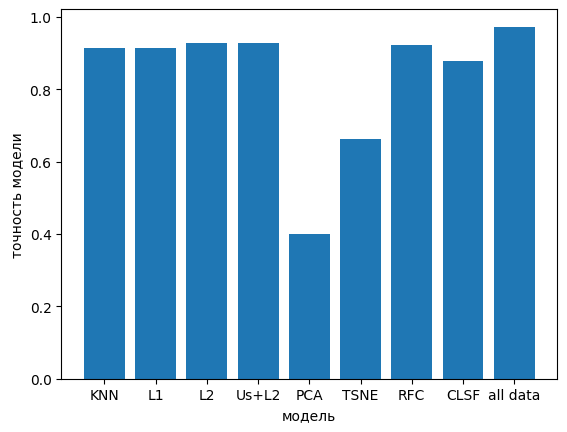

In [33]:
alg = ("KNN", "L1", "L2", "Us+L2", "PCA", "TSNE", "RFC", "CLSF", "all data")
results = (kNeib_result, l1_result, l2_result, undersample_l2_result, pca_result, tsne_result, rfc_result, clsf_result, best_result)

plt.bar(alg, results)
plt.ylabel("точность модели")
plt.xlabel("модель")
plt.xticks(alg)
plt.show()